In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

In [3]:
df = pd.read_csv(r'C:\Users\harr1\Desktop\Thinkful\StudentsPerformance.csv')
print (df.head(10))


   gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   
5  female        group B          associate's degree      standard   
6  female        group B                some college      standard   
7    male        group B                some college  free/reduced   
8    male        group D                 high school  free/reduced   
9  female        group B                 high school  free/reduced   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                  

In [4]:
df ['test average'] = df.mean(axis=1)
print (df.head(10))

   gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   
5  female        group B          associate's degree      standard   
6  female        group B                some college      standard   
7    male        group B                some college  free/reduced   
8    male        group D                 high school  free/reduced   
9  female        group B                 high school  free/reduced   

  test preparation course  math score  reading score  writing score  \
0                    none          72             72             74   
1               completed          69             90             88   
2               

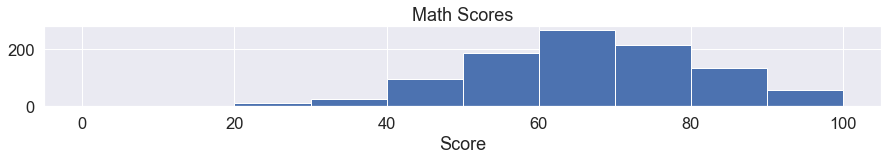

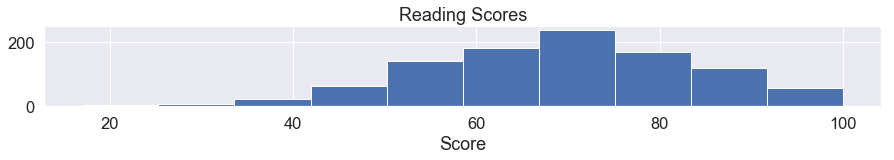

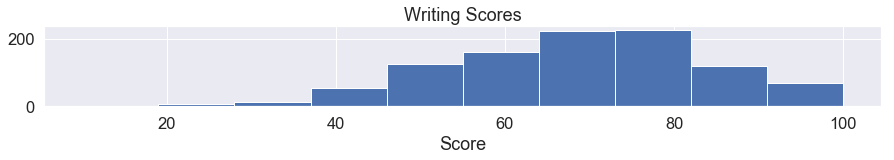

In [90]:
#Check histograms to see data distribution and to find any skew in the data or invalid values

plt.figure(figsize=(15,5))

plt.subplot (3,1,1)
plt.hist(df['math score'])
plt.title('Math Scores')
plt.xlabel('Score')
plt.show()

plt.figure(figsize=(15,5))
plt.subplot (3,1,2)
plt.title('Reading Scores')
plt.xlabel('Score')
plt.hist(df['reading score'])
plt.show ()


plt.figure(figsize=(15,5))
plt.subplot (3,1,3)
plt.title('Writing Scores')
plt.hist(df['writing score'])
plt.xlabel('Score')
plt.show ()

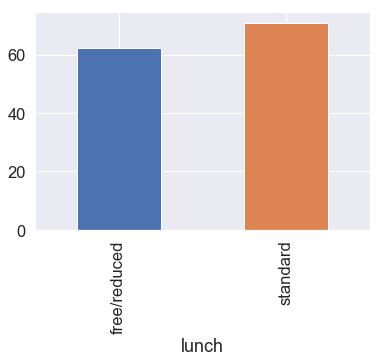

In [91]:
df.groupby("lunch")['test average'].mean().plot(kind='bar')

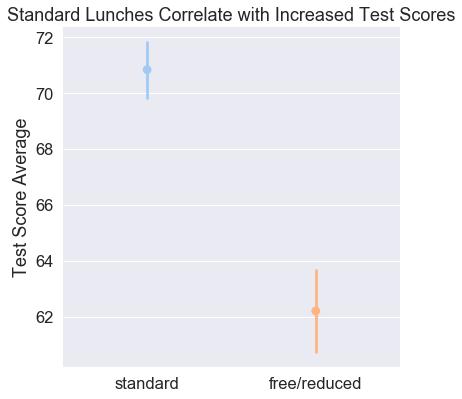

In [155]:
sns.set(style="darkgrid", font_scale = 1.5)

g = sns.factorplot(x="lunch", y="test average", data=df,
                   size=6, kind="point", palette="pastel",ci=95,dodge=True,join=False)
g.despine(left=True)
g.set_ylabels("Test Score Average")
g.set_xlabels("")
plt.title('Standard Lunches Correlate with Increased Test Scores')
plt.title
plt.show()

In [94]:
#Standard lunches perform 8% better than free/reduced
df.groupby('lunch')['test average'].mean()

lunch
free/reduced    62.199061
standard        70.837209
Name: test average, dtype: float64

In [93]:
#are these numbers significantly different? Yes!

stats.ttest_ind(df[df.lunch == 'standard']['test average'],
                df[df.lunch == 'free/reduced']['test average'])

Ttest_indResult(statistic=9.575113051511476, pvalue=7.736791812495384e-21)

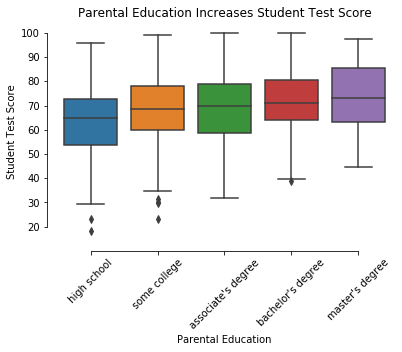

In [7]:
ax = sns.boxplot(x='parental level of education', y='test average', data=df, order = ["high school", "some college", "associate's degree", "bachelor's degree", "master's degree"])
plt.title('Parental Education Increases Student Test Score')
sns.despine(offset=10, trim = True)
ax.set(xlabel='Parental Education', ylabel = 'Student Test Score')
for item in ax.get_xticklabels():
    item.set_rotation(45)
plt.show()

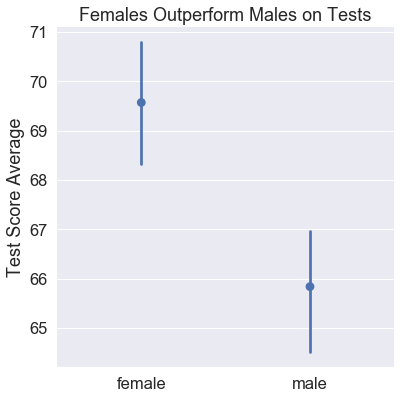

In [96]:
sns.set(style="darkgrid", font_scale = 1.5)

g = sns.factorplot(x="gender", y="test average", data=df,
                   size=6, kind="point", ci=95,dodge=True,join=False)

g.despine(left=True)
g.set_ylabels("Test Score Average")
g.set_xlabels("")
plt.title('Females Outperform Males on Tests')
plt.title
plt.show()

In [95]:
stats.ttest_ind(df[df.gender == 'female']['test average'],
                df[df.gender == 'male']['test average'])

Ttest_indResult(statistic=4.169913529142, pvalue=3.311973638243664e-05)

In [97]:
df.groupby('gender')['test average'].mean()

gender
female    69.569498
male      65.837483
Name: test average, dtype: float64

In [119]:
#Difference in means for females vs males is statistically different
69.569498-65.837483

3.73201499999999

In [99]:
df.groupby('parental level of education')['test average'].mean()

parental level of education
associate's degree    69.569069
bachelor's degree     71.923729
high school           63.096939
master's degree       73.598870
some college          68.476401
some high school      65.108007
Name: test average, dtype: float64

In [142]:
df.groupby('parental level of education')['test average'].mean()


parental level of education
associate's degree    69.569069
bachelor's degree     71.923729
high school           63.096939
master's degree       73.598870
some college          68.476401
some high school      65.108007
Name: test average, dtype: float64

In [114]:
df.groupby('test preparation course')['test average'].mean()

test preparation course
completed    72.669460
none         65.038941
Name: test average, dtype: float64

In [118]:
#Difference in means for test course vs none is statistically different
72.669460-65.038941

7.630519000000007

In [132]:
Mean_differences = {
    'Lunch': 8.638148000000001,
    'Gender': 3.73201499999999,
    'Prep course': 7.630519000000007,
    'Parental Education': 8.826789999999995
}

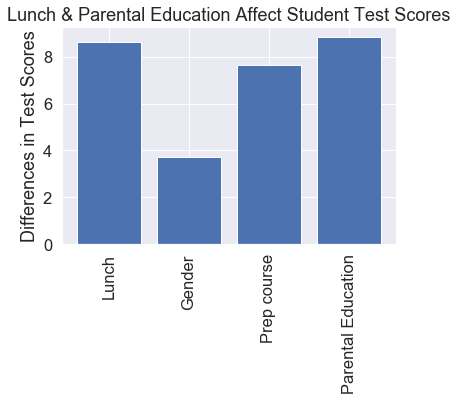

In [137]:
plt.bar(range(len(Mean_differences)), list(Mean_differences.values()), align='center')
plt.xticks(range(len(Mean_differences)), list(Mean_differences.keys()))
plt.xticks(rotation= 90)
plt.title('Lunch & Parental Education Affect Student Test Scores')
plt.ylabel("Differences in Test Scores")
plt.show()

In [ ]:
#Two differences representing clear significance here. Parental education and Lunch. Focusing on the lunch, could be more of 
#a socioeconomic issue than a lunch issue BUT we can do an experiment to analyze this.

In [ ]:
#Question: Will increasing health of lunch have an effect on test scores?
#Hypothesis: Increaing healthy content of lunch will result in higher test scores
#Experimental Design: Provide random sample of students with the classic 'free/reduced' lunch that they have been receiving.
#Label this group A. Group B will be students that have a meal with reduced sodium, increased protein, and more fruit/vegetables
#After two weeks of this lunch treatment, have students take a similar, three category test and compare the test averages. 
#Benchmark: If students with healthier lunch increase test scores by 2%, continue experiment for one month. If students
#with healthier lunches score 4% higher after 1 month, this cuts the discrepancy in half and can therefore be labeled a success.